[View in Colaboratory](https://colab.research.google.com/github/ofenerci/ITW2018/blob/master/ITW2018_DataAnalysisGroup.ipynb)

# Data Analysis in Particle Physics (Nuclear  Physics)
We are bombarded with data every day. We are living in the age of data driving models. But how do we interpret data. Radioactivity is  almost part of high school curriculum and we decided to show how to interpret radioactivity data, which is related to particle physics. 


## Radioactive Decay
Radioactive decay is the process by which an unstable subatomic particle physics transforms into multiple into multiple particles. During the process, the total amount of the radioactive element decreases over time. For example, Carbon atom  $^{12}_6\text{C}$ has isotopes, most of which are radioactive. One of them is $^{10}_6\text{C}$ and is radioactive. 

Although the decay of individual nuclei happens randomly, it turns out that large numbers of nuclei can be modelled by a mathematical function that predicts the amount of radioactive nuclei remaining at a given time:

$$ N(t)= N_{0}e^{-\lambda t}$$

where

$\textbf{N(t)}$ is the number of radioactive atoms left at time $t$.

$\textbf{N}_{0}$ is the number of radioactive atoms at the begining. 

$\boldsymbol{\lambda}$ is the decay constant, which controls how quickly the total number of nuclei decays. 

Before going into detail, we would like to introduce basic plotting with python. 

__Example__:
The decay constant $^{10}_6\text{C}$ nuclei is 0.036. The number atoms at the beginning is 1000. Plot the number of radioactive nuclei remaining  in a sample of material against time ( $ 0<t<100$ seconds). 

We will use *numpy* and *matplotlib* libraries to plot this graph. 




In [9]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np
# Define constants
N0=1000; # the number of nuclei at the beginning.
lam = 0.036 # decay constant lambda
#Generate points for time starting 0s, ending 100s with a time interval 5s.
t = np.arange(0,101,5)
print(t)


[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]


As we see we produced data points for $t$ from 0 to 100s with a interval of 5s. Now let's produce data points for $N(t)$.


In [10]:
N = N0 * np.exp(-t*lam)
print(N)

[1000.          835.27021141  697.67632607  582.74825237  486.75225596
  406.56965974  339.59552564  283.6540265   236.92775868  197.89869908
  165.29888822  138.06923731  115.32512104   96.32763823   80.45960675
   67.20551274   56.13476283   46.88769522   39.1638951    32.71243494
   27.32372245]


Now we created two data points for two variables, which are $N(t)$ and $t$. To determine the relationship between two variables, we will use the *plot* library function *scatter()*. 

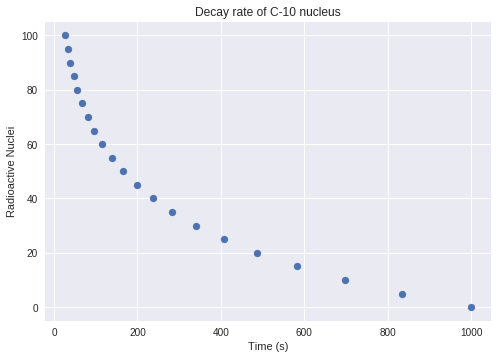

In [11]:
plt.scatter(N,t)
plt.title('Decay rate of C-10 nucleus')
plt.xlabel ('Time (s)')
plt.ylabel('Radioactive Nuclei')
plt.show()

__Example__: Here is a data on the radioactive decay of Strontium 90. 

|Time (years)| Amount of Strontium 90(grams)|
|---|---|
|0|100|
|25|50|
|50|25|
|75|12.5|
|100|6.25|
|125|3.135|
|150|1.5625|
|175|0.78125|

## Half-life
Half-life is defined as the time it takes one-half atoms of radioactive material to disintegrate.

__Question__: Looking at the data above, how do you determine the half-life? We have started 100 grams of Strontium and using the definition of half-life, we need to find the time passed for  half of the radioactive material disintegrated,  that is 50 years. 


## Relation between half-life and decay constant
The half-life is the time ($T_{1/2}$) it takes for the half of radioactive nuclei decay into stable from. By using this definition, 

$N_{0}/2= N_{0}*\exp(-T_{1/2}\lambda)$.
By taking natural log (ln) of both sides, we find that

\begin{align}
\ln(N_{0}/2) &=\ln(N_{0}*\exp(-T_{1/2}\lambda) ) \\
\ln(N_{0})-ln(2) &= \ln(N_{0})-T_{1/2}\lambda \\
T_{1/2}= ln(2)/\lambda
\end{align}


## How to draw data



Assign time to $t$ and amount of strontium to $N(t)$

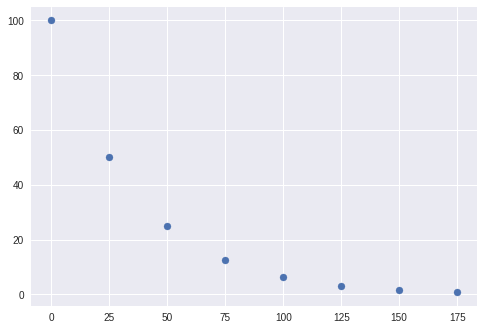

In [12]:
t = np.array([0,25,50,75,100,125,150,175])
N = np.array([100,50,25,12.5,6.25,3.135,1.5625,0.78125])
plt.scatter(t,N)
plt.show()

To find the decay constant, we will take the natural log of both sides of decay formula,

\begin{align}
 N(t) & =N(0)*exp(-\lambda t) \\
\ln(N(t)) & = \ln(N(0)*exp(-\lambda t))\\
\ln(N(t)) & = \ln(N(0)) -\lambda * t
\end{align}


In [0]:
#log of N(t)
lN = np.log(N)

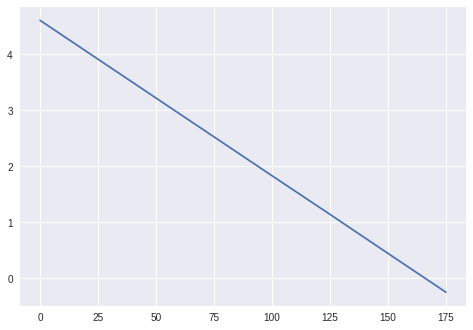

In [36]:
plt.plot(t,lN)

The plot now is linear and we'e familiar with this plot from our math courses. The slope of the line gives $\lambda$. 

__Question__ : What is the slope of the line?

We can use every function inside the numpy library. There are hundreds of functions inside numpy library.  You can always get help on the library by entering a command ()This command will or will not work inside "google colab" notebook)

__help(numpy)__

or 

if  you know which function from the library you will use, you may always get help on a special function from the library. You can look up all the functions in __numpy__ library by the command:





In [0]:
import numpy
dir(numpy)




You will see many functions inside the numpy library. You could try a few of functions. We will use  __polyfit__ function, which help us to find the slope of the linear function. You may get help by 

__help(numpy.polyfit)__

In [0]:
help(numpy.polyfit)

We drew a plot of 

$\log(N(t)) = \log(N(0)) -\lambda * t$,

which is a linear function like  $y = mx+b$ where

\begin{align}
y &= \log(N(t)) \\
x &= t \\
m & = -\lambda \\
b & = \log(N(0))
\end{align}



In [0]:
a=  np.polyfit(t,lN,1)
# Here is the template : polyfit(x,y,n) returns the coefficients for a polynamial p(x) of degree n that is the best fit for the data in y. As we fit the data 1st degree of polynomial (y=mx+b), n=1. The coefficients are in descending order, which means [m,]

In [38]:
print(a)

[-0.02772132  4.60517019]


In [44]:
HalfTime= np.log(2)/0.027
print(HalfTime)

25.672117798516492
